<h4>ChatGPT vs Bing Source Overlap</h4>
<p>
This notebook presents a comparative analysis of source overlap between ChatGPT and Bing.
The objective is to quantify the extent to which both systems cite or reference overlapping web sources when responding to the same queries.
</p>

In [1]:
import pandas as pd
import numpy as np

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..", "src")))
from data import get_chatgpt_df, get_bing_df
from metrics import syntactic_overlap
from plots import boxplot

<h4>Dataset: ChatGPT</h4>

In [2]:
chatgpt_df = get_chatgpt_df()
chatgpt_df

,query,product,market_type,query_level,response_text,sources_cited,sources_additional,sources_all,domains_cited,domains_additional,domains_all,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[There’s no one “best” smartphone that’s perfe...,[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.tomsguide.com/phones/android-pho...,[[https://www.tomsguide.com/best-picks/best-ph...,"[[tomsguide.com, forbes.com], [tomsguide.com],...","[[reddit.com, tomsguide.com, techrepublic.com,...","[[tomsguide.com, forbes.com, reddit.com, techr...","[[Apple iPhone 17 Pro Max, Samsung Galaxy S25 ..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,"[There’s no one “best” smartphone under $1,000...",[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.androidcentral.com/best-android-...,[[https://www.tomsguide.com/best-picks/best-ph...,"[[tomsguide.com, phonearena.com, wired.com], [...","[[reddit.com, theverge.com, techadvisor.com, w...","[[tomsguide.com, phonearena.com, wired.com, re...","[[Samsung Galaxy S25, Samsung Galaxy S25+, App..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,"[There’s no one-size-fits-all “best” phone, be...",[[https://www.techradar.com/news/best-cameraph...,[[https://coffeechoice.org/en/best-smartphones...,[[https://www.techradar.com/news/best-cameraph...,"[[tomsguide.com, techradar.com], [abdgadgets.c...","[[reddit.com, tomsguide.com, stuff.tv, techadv...","[[tomsguide.com, techradar.com, reddit.com, st...","[[Apple iPhone 16 Pro, Samsung Galaxy S25 Ultr..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[That’s a great question — the “best” depends ...,[[https://www.androidcentral.com/phones/oneplu...,[[https://www.techadvisor.com/article/723383/b...,[[https://www.androidcentral.com/phones/oneplu...,"[[androidcentral.com, tomsguide.com, phonearen...","[[tomsguide.com, wired.com, co.uk, 9to5google....","[[androidcentral.com, tomsguide.com, phonearen...","[[OnePlus 13, Samsung Galaxy S25, Google Pixel..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[There’s no one-size-fits-all “best laptop” — ...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.bleepingcomputer.com/forums/t/81...,[[https://www.pcworld.com/article/436674/best-...,"[[windowscentral.com, rtings.com, pcworld.com,...","[[reddit.com, bestbuy.com, windowscentral.com,...","[[windowscentral.com, rtings.com, pcworld.com,...","[[Lenovo Yoga 9i 2-in-1 Aura Edition, Lenovo T..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[There’s no one-size-fits-all “best” laptop un...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,[[https://www.tomshardware.com/best-picks/best...,"[[tomshardware.com, wired.com], [tomshardware....","[[reddit.com, tomshardware.com, pcworld.com, y...","[[tomshardware.com, wired.com, reddit.com, pcw...","[[HP Victus 16, Asus Zenbook S 16, MacBook Air..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[“Best” depends a lot on what you plan to use ...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,[[https://www.tomshardware.com/best-picks/best...,"[[tomshardware.com, techradar.com], [tomshardw...","[[reddit.com, tomsguide.com, tomshardware.com,...","[[tomshardware.com, techradar.com, reddit.com,...","[[HP Victus 16, Apple MacBook Air 15″ (M4), HP..."
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[“Best” always depends a bit on what you value...,[[https://www.ultrabookreview.com/2071-best-ga...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.ultrabookreview.com/2071-best-

<h4>Dataset: Bing</h4>

In [3]:
bing_df = get_bing_df()
bing_df

,query,product,market_type,query_level,content,url,domain,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[The Best Phones We've Tested for 2025 | PCMag...,"[https://www.pcmag.com/picks/the-best-phones, ...","[pcmag.com, tomsguide.com, techradar.com, zdne...","[[Apple iPhone 17, Samsung Galaxy S25 Ultra, S..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,[Top Smartphones Under $1000 About UsTrendingR...,[https://www.analyticsinsight.net/gadgets/best...,"[analyticsinsight.net, techwiser.com, techspec...","[[Samsung Galaxy S25, iPhone 16 Pro, Google Pi..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,[9 Best Camera Phones Under $1000 for Amazing ...,[https://www.techwisehub.com/blog/best-camera-...,"[techwisehub.com, techwiser.com, amateurphotog...","[[Samsung Galaxy S25, iPhone 16, Google Pixel ..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[Best Phones Under $1000 (August 2025) - TechW...,[https://techwiser.com/best-phones-under-1000-...,"[techwiser.com, pcmag.com, techspecs.info, ana...","[[Apple iPhone 16 Pro, Samsung Galaxy S25 Plus..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[The Best Laptops We've Tested (September 2025...,"[https://www.pcmag.com/picks/the-best-laptops,...","[pcmag.com, nytimes.com, tomsguide.com, zdnet....","[[Dell 14 Plus (DB14250), Dell Precision 5690,..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[10 Best Laptops 2025 Under $1500: Complete Gu...,[https://gadgetsandall.com/10-best-laptops-202...,"[gadgetsandall.com, gizmodo.com, dockuniverse....","[[Apple MacBook Air 13″ (M4), ASUS ROG Strix G..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[10 Best Laptops Under $1500 for 2025: Perform...,[https://dockuniverse.com/best-laptops-for-150...,"[dockuniverse.com, pcmag.com, dockuniverse.com...",[[MSI Titan 18 HX Gaming Laptop (A14VIG-036US)...
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[10 Best Laptops Under $1500 for 2025: Perform...,[https://dockuniverse.com/best-laptops-for-150...,"[dockuniverse.com, pcmag.com, gizmodo.com, ofz...","[[MSI Titan 18 HX, ASUS Zenbook 14, MSI Titan ..."
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,[The Best Smartwatches We've Tested for 2025 |...,[https://www.pcmag.com/picks/the-best-smartwat...,"[pcmag.com, forbes.com, tomsguide.com, techrad...","[[Apple Watch Series 11, Samsung Galaxy Watch ..."
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,[Best budget smartwatches: 6 cheap but good op...,[https://www.wareable.com/smartwatches/best-ch...,"[wareable.com, tomsguide.com, pcmag.com, techr...","[[Amazfit Active 2, Huawei Watch Fit 3, Xiaomi..."


<h4>Cross-System Mean Source Overlap (CSMSO) - Definition & Implementation</h4>
<p>To evaluate how closely ChatGPT’s cited sources align with the web pages retrieved by Bing for the same query, we define the Cross-System Mean Source Overlap (CSMSO). This metric helps us capture, on average, how much overlap exists between ChatGPT’s cited sources and Bing’s organic results across multiple runs.</p>
<ul>
  <li>ChatGPT source lists: $ G_q = [g_{q1}, g_{q2}, g_{q3}] $, where each $ g_{qi} $ is the list of sources cited by ChatGPT in run $ i $ for query $ q $.</li>
  <li>Bing results: $ B_q = [b_{q1}, \ldots, b_{q10}] $, where each $ b_{qi} $ is an individual Bing organic search result i for query $ q $.</li>
</ul>
<p>Formally, the Cross-System Mean Source Overlap for query $ q $ is</p>
<p>
\[
\mathrm{CSMSO}(q) = \frac{1}{|G_q|} \sum_{i=1}^{|G_q|} O_{\text{syntactic}}(g_{qi}, B_q)
\]
</p>
<p>Here, $ O_{\text{syntactic}}(g_{qi}, B_q) $ denotes the syntactic overlap between the ChatGPT source list $ g_{qi} $ and Bing’s aggregated set derived from $ B_q $. Higher $ \mathrm{CSMSO}(q) $ indicates greater alignment in referenced domains across systems for the same query.</p>


In [4]:
def calc_csmso(chatgpt_df, bing_df, chatgpt_sources):
    results = []
    
    for idx, row in chatgpt_df.iterrows():
        query = row.get("query")
        
        b = bing_df[bing_df["query"] == query]["url"].iloc[0]        
        g_lists = row[chatgpt_sources]
        pairwise_scores = [syntactic_overlap(g, b) for g in g_lists]
        
        results.append({
            "query": query,
            "product": row.get("product"),
            "market_type": row.get("market_type"),
            "query_level": row.get("query_level"),
            "csmso_mean": float(np.mean(pairwise_scores)),
            "csmso_std": float(np.std(pairwise_scores, ddof = 0)) if len(pairwise_scores) > 1 else 0.0,
        })
    
    return pd.DataFrame(results)

<h4>Mean Internal Source Overlap - Analysis (ChatGPT: Cited Sources in Response)</h4>

In [5]:
csmso_df_cs = calc_csmso(chatgpt_df, bing_df, chatgpt_sources = "sources_cited")
csmso_df_cs

,query,product,market_type,query_level,csmso_mean,csmso_std
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,0.722222,0.207870
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.333333,0.471405
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.000000,0.000000
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.000000,0.000000
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.577778,0.125708
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.000000,0.000000
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.000000,0.000000
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.000000,0.000000
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.550000,0.147196
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,0.000000,0.000000


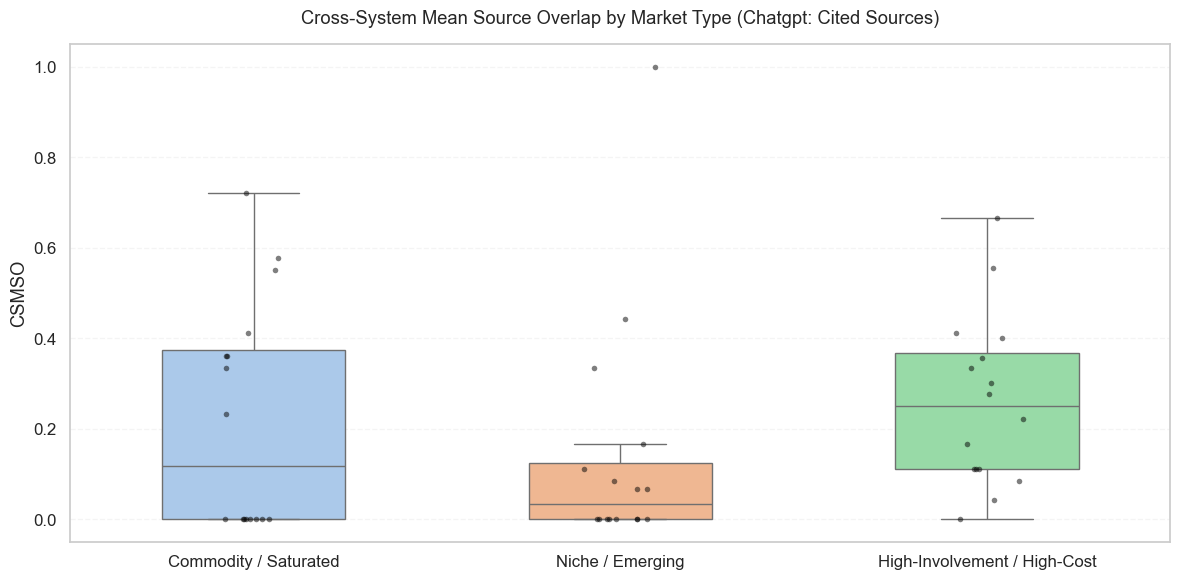

In [6]:
csmso_cs_cs = csmso_df_cs[csmso_df_cs["market_type"] == "Commodity / Saturated"]
csmso_ne_cs = csmso_df_cs[csmso_df_cs["market_type"] == "Niche / Emerging"]
csmso_hh_cs = csmso_df_cs[csmso_df_cs["market_type"] == "High-Involvement / High-Cost"]

plot_df_cs = pd.DataFrame({
    "CSMSO": pd.concat([
        csmso_cs_cs["csmso_mean"],
        csmso_ne_cs["csmso_mean"],
        csmso_hh_cs["csmso_mean"],
    ], ignore_index = True),
    "Market Type": (
        ["Commodity / Saturated"] * len(csmso_cs_cs)
        + ["Niche / Emerging"] * len(csmso_ne_cs)
        + ["High-Involvement / High-Cost"] * len(csmso_hh_cs)
    )
})

boxplot(
    df = plot_df_cs,
    x_col = "Market Type",
    y_col = "CSMSO",
    order = ["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title = "Cross-System Mean Source Overlap by Market Type (Chatgpt: Cited Sources)",
    xlabel = "",
    ylabel = "CSMSO"
)

<h4>CSMSO by Market Type (ChatGPT cited sources vs. Bing)</h4> <p>The boxplots show median overlap is lowest in Niche/Emerging, moderate in High-Involvement/High-Cost, and variable in Commodity/Saturated with a wide spread and some high-overlap cases. Overall alignment between ChatGPT citations and Bing organic results is modest across all market types.</p> <ul> <li>Commodity/Saturated markets often share authoritative, evergreen sources (major brands, top publishers), so Bing and ChatGPT can converge; variability reflects SERP competition and mixed intents (reviews, “best of,” specs).</li> <li>Niche/Emerging queries fragment authority and favor freshness; Bing surfaces newer/long-tail pages while ChatGPT’s synthesis may cite developer docs or scattered posts, reducing overlap.</li> <li>High-Involvement/High-Cost queries tilt toward reviews/specs that partially align; ChatGPT’s deduplication and summary behavior can keep a core set while Bing diversifies domains (retailers, forums), limiting full match.</li> </ul>

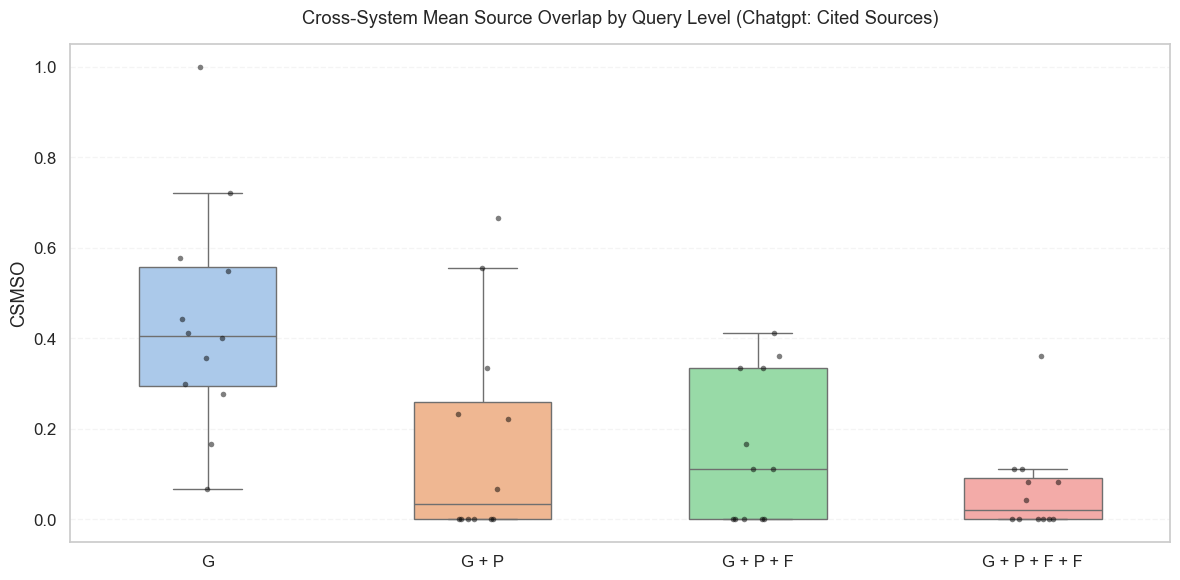

In [7]:
csmso_g_cs = csmso_df_cs[csmso_df_cs["query_level"] == "General"]
csmso_gp_cs = csmso_df_cs[csmso_df_cs["query_level"] == "General & Price"]
csmso_gpf_cs = csmso_df_cs[csmso_df_cs["query_level"] == "General & Price & Feature"]
csmso_gpff_cs = csmso_df_cs[csmso_df_cs["query_level"] == "General & Price & Feature & Feature"]

plot_df_cs = pd.DataFrame({
    "CSMSO": pd.concat([
        csmso_g_cs["csmso_mean"],
        csmso_gp_cs["csmso_mean"],
        csmso_gpf_cs["csmso_mean"],
        csmso_gpff_cs["csmso_mean"]
    ], ignore_index = True),
    "Query Level": (
        ["G"] * len(csmso_g_cs)
        + ["G + P"] * len(csmso_gp_cs)
        + ["G + P + F"] * len(csmso_gpf_cs)
        + ["G + P + F + F"] * len(csmso_gpff_cs)
    )
})

boxplot(
    df = plot_df_cs,
    x_col = "Query Level",
    y_col = "CSMSO",
    order = ["G", "G + P", "G + P + F", "G + P + F + F"],
    title = "Cross-System Mean Source Overlap by Query Level (Chatgpt: Cited Sources)",
    xlabel = "",
    ylabel = "CSMSO"
)

<h4>CSMSO by Query Level (G → G+P → G+P+F → G+P+F+F)</h4> <p>The boxplots show the highest overlap for general (G) queries. Overlap drops sharply when a product is specified (G+P), partially rebounds with one feature constraint (G+P+F), and is lowest when two feature constraints are added (G+P+F+F). The general trend is decreasing overlap as constraints increase.</p> <ul> <li>Adding product and feature filters narrows candidate sets and shifts SERPs toward variant/retailer pages; ChatGPT often cites brand docs and review roundups to satisfy constraints, reducing domain match.</li> <li>Single-feature queries sometimes align because both systems surface spec/review pages optimized for that attribute (intent match, vertical relevance); a second feature pushes results into long-tail pages with low shared authority.</li> <li>LLM behaviors (constraint satisfaction and cross-source synthesis with deduplication) favor a few canonical sources, while Bing’s diversity and freshness weighting broaden domains, lowering overlap.</li> </ul>

<br/>

<h4>Mean Internal Source Overlap - Analysis (ChatGPT: All Sources in Response)</h4>

In [8]:
csmso_df_as = calc_csmso(chatgpt_df, bing_df, chatgpt_sources = "sources_all")
csmso_df_as

,query,product,market_type,query_level,csmso_mean,csmso_std
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,0.300000,0.000000e+00
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.100000,1.387779e-17
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.185185,1.047566e-01
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.125000,0.000000e+00
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.233333,4.714045e-02
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.066667,4.714045e-02
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.000000,0.000000e+00
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.037037,5.237828e-02
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.333333,0.000000e+00
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,0.037037,5.237828e-02


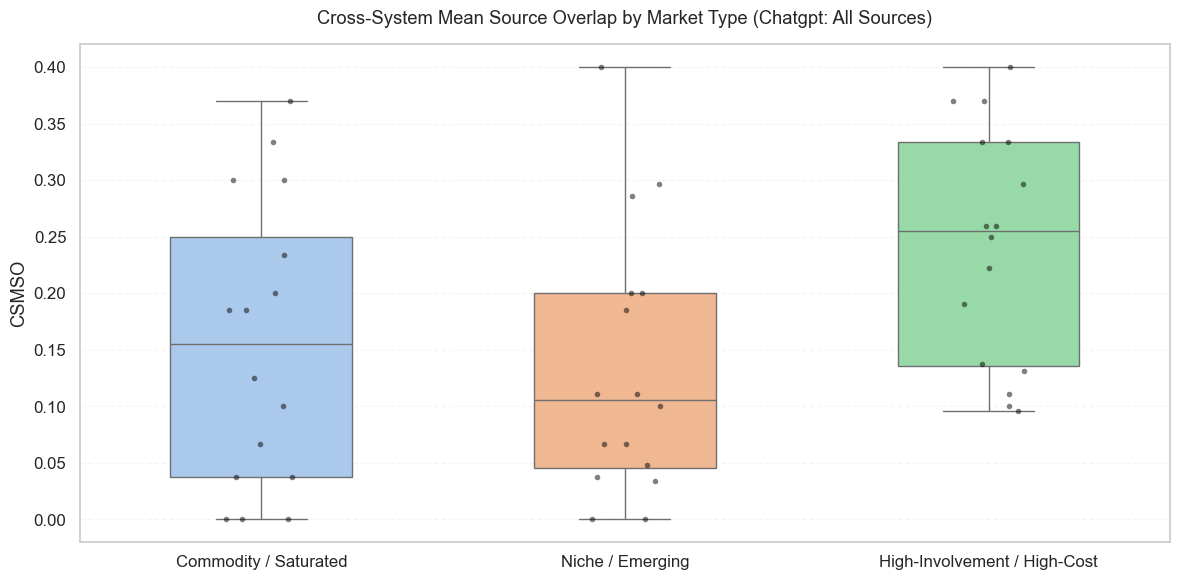

In [9]:
csmso_cs_as = csmso_df_as[csmso_df_as["market_type"] == "Commodity / Saturated"]
csmso_ne_as = csmso_df_as[csmso_df_as["market_type"] == "Niche / Emerging"]
csmso_hh_as = csmso_df_as[csmso_df_as["market_type"] == "High-Involvement / High-Cost"]

plot_df_as = pd.DataFrame({
    "CSMSO": pd.concat([
        csmso_cs_as["csmso_mean"],
        csmso_ne_as["csmso_mean"],
        csmso_hh_as["csmso_mean"],
    ], ignore_index = True),
    "Market Type": (
        ["Commodity / Saturated"] * len(csmso_cs_as)
        + ["Niche / Emerging"] * len(csmso_ne_as)
        + ["High-Involvement / High-Cost"] * len(csmso_hh_as)
    )
})

boxplot(
    df = plot_df_as,
    x_col = "Market Type",
    y_col = "CSMSO",
    order = ["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title = "Cross-System Mean Source Overlap by Market Type (Chatgpt: All Sources)",
    xlabel = "",
    ylabel = "CSMSO"
)

<h4>CSMSO by Market Type (ChatGPT: All Sources)</h4> <p>Including all sources cited by ChatGPT raises overall overlap slightly but maintains the same relative pattern: Niche/Emerging markets show the lowest alignment, Commodity/Saturated remain mid-range, and High-Involvement/High-Cost show the highest overlap.</p> <ul> <li>High-Involvement/High-Cost queries often reference well-established review or comparison sites that also rank prominently on Bing, producing higher shared domains.</li> <li>Niche/Emerging topics continue to diverge because Bing favors newer, SEO-optimized pages while ChatGPT aggregates smaller or technical sources not yet ranked highly.</li> <li>Commodity/Saturated queries blend mass-market pages and broad coverage, so overlap depends on whether ChatGPT retains diverse sources or collapses to brand and aggregator sites.</li> </ul>

<br/>

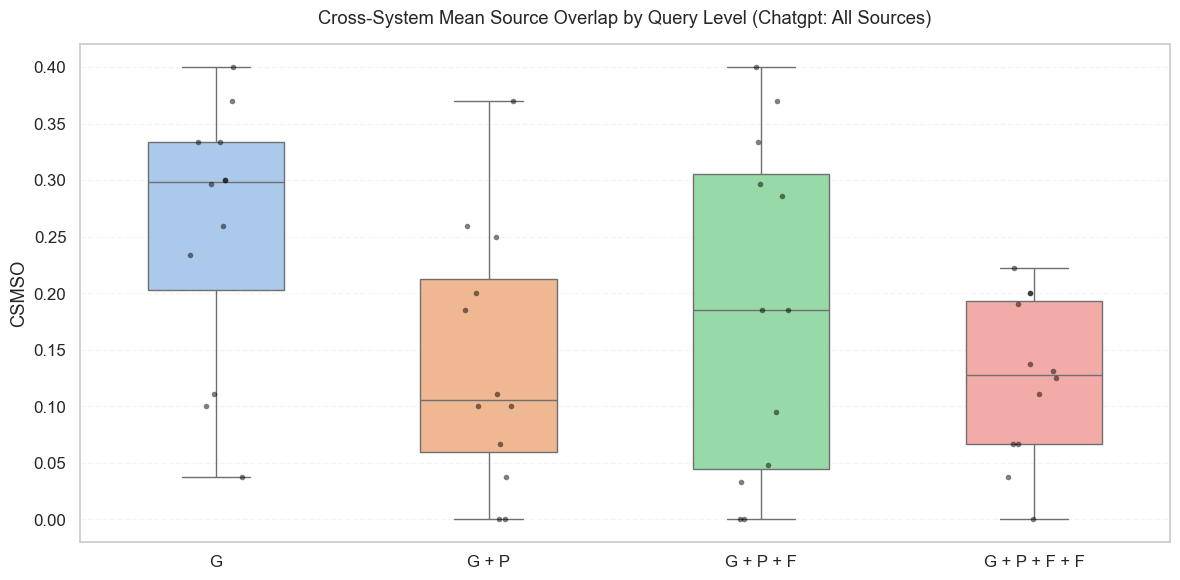

In [10]:
csmso_g_as = csmso_df_as[csmso_df_as["query_level"] == "General"]
csmso_gp_as = csmso_df_as[csmso_df_as["query_level"] == "General & Price"]
csmso_gpf_as = csmso_df_as[csmso_df_as["query_level"] == "General & Price & Feature"]
csmso_gpff_as = csmso_df_as[csmso_df_as["query_level"] == "General & Price & Feature & Feature"]

plot_df_as = pd.DataFrame({
    "CSMSO": pd.concat([
        csmso_g_as["csmso_mean"],
        csmso_gp_as["csmso_mean"],
        csmso_gpf_as["csmso_mean"],
        csmso_gpff_as["csmso_mean"]
    ], ignore_index = True),
    "Query Level": (
        ["G"] * len(csmso_g_as)
        + ["G + P"] * len(csmso_gp_as)
        + ["G + P + F"] * len(csmso_gpf_as)
        + ["G + P + F + F"] * len(csmso_gpff_as)
    )
})

boxplot(
    df = plot_df_as,
    x_col = "Query Level",
    y_col = "CSMSO",
    order = ["G", "G + P", "G + P + F", "G + P + F + F"],
    title = "Cross-System Mean Source Overlap by Query Level (Chatgpt: All Sources)",
    xlabel = "",
    ylabel = "CSMSO"
)

<h4>CSMSO by Query Level (ChatGPT: All Sources)</h4> <p>When all ChatGPT sources are considered, general (G) queries still show the highest overlap, with a clear decline once product and feature constraints are added. However, overlap partially recovers for single-feature (G+P+F) queries before falling again at two-feature (G+P+F+F) level.</p> <ul> <li>General queries align because both systems favor high-authority explanatory pages and established informational domains.</li> <li>Adding product constraints narrows the SERP and introduces brand-specific heterogeneity; Bing diversifies retail links while ChatGPT retains core brand and review domains.</li> <li>The rebound at G+P+F reflects overlapping coverage of specification and comparison content, while the final decline shows how deeper constraints push ChatGPT into focused, low-overlap sources outside Bing’s top results.</li> </ul>